In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef, precision_recall_curve, auc

In [2]:
# !pip install xgboost

# Pre-process dataset

In [3]:
df = pd.read_csv('../00_dataset/YelpZip/metadata', 
                 sep='\t',
                 header=None,
                 names=["user_id", "prod_id", "rating", "label", "date"])
df

,user_id,prod_id,rating,label,date
0,5044,0,1.0,-1,2014-11-16
1,5045,0,1.0,-1,2014-09-08
2,5046,0,3.0,-1,2013-10-06
3,5047,0,5.0,-1,2014-11-30
4,5048,0,5.0,-1,2014-08-28
...,...,...,...,...,...
608593,119664,5039,4.0,1,2013-01-20
608594,56277,5039,2.0,1,2012-11-12
608595,265320,5039,1.0,1,2012-08-22
608596,161722,5039,4.0,1,2011-05-11


In [4]:
# Check for Null values
df.isnull().sum()

user_id    0
prod_id    0
rating     0
label      0
date       0
dtype: int64

In [ ]:
# Equalise 1 and -1 labels, only 8000 rows per label
# positive_df = df[(df['label'] == 1)][:8000]
# negative_df = df[(df['label'] == -1)][:8000]
# positive_df = df[(df['label'] == 1)]
# negative_df = df[(df['label'] == -1)]
# negative_df["label"] = 0
# dataset_df = pd.concat([positive_df, negative_df])
df['label'] = df['label'].replace({1: 0, -1: 1})
dataset_df = df
dataset_df

C:\Users\cryst\AppData\Local\Temp\ipykernel_34660\2848714389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df["label"] = 0


,user_id,prod_id,rating,label,date
7,5051,0,1.0,1,2014-12-05
8,5052,0,2.0,1,2014-11-26
9,5053,0,4.0,1,2014-11-17
10,5054,0,3.0,1,2014-10-20
11,5055,0,5.0,1,2014-10-13
...,...,...,...,...,...
608583,265316,5042,5.0,0,2014-12-24
608586,247830,5039,3.0,0,2011-12-03
608587,265318,5039,4.0,0,2015-01-02
608588,100625,5039,4.0,0,2013-11-02


# Create Train-test split

In [6]:
y = dataset_df['label']
X = dataset_df.drop('label', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define Models that will be used

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier  # Boosting
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "LR": LogisticRegression(),
    "NN": MLPClassifier(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "AB": AdaBoostClassifier(),
    "XGB": XGBClassifier(),
    "NB": GaussianNB(),
    # "SVM": SVC()
}

results = []

# Example usage: print model names
for category, model in models.items():
    print(f"{category}: {model.__class__.__name__}")

LR: LogisticRegression
NN: MLPClassifier
KNN: KNeighborsClassifier
DT: DecisionTreeClassifier
RF: RandomForestClassifier
AB: AdaBoostClassifier
XGB: XGBClassifier
NB: GaussianNB


# Without Feature Engineering

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

Before SMOTE: (426018, 2)
After SMOTE: (739384, 2)
=== Model: LR ===
Accuracy: 0.560, Precision: 0.867, Recall: 0.583, F1: 0.697
Balanced Accuracy: 0.497
=== Model: NN ===
Accuracy: 0.576, Precision: 0.908, Recall: 0.569, F1: 0.699
Balanced Accuracy: 0.595
=== Model: KNN ===
Accuracy: 0.850, Precision: 0.872, Recall: 0.969, F1: 0.918
Balanced Accuracy: 0.517
=== Model: DT ===
Accuracy: 0.627, Precision: 0.893, Recall: 0.649, F1: 0.751
Balanced Accuracy: 0.568
=== Model: RF ===
Accuracy: 0.630, Precision: 0.892, Recall: 0.653, F1: 0.754
Balanced Accuracy: 0.567
=== Model: AB ===


c:\Users\cryst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.572, Precision: 0.908, Recall: 0.563, F1: 0.695
Balanced Accuracy: 0.595
=== Model: XGB ===
Accuracy: 0.599, Precision: 0.906, Recall: 0.600, F1: 0.722
Balanced Accuracy: 0.596
=== Model: NB ===
Accuracy: 0.737, Precision: 0.878, Recall: 0.809, F1: 0.842
Balanced Accuracy: 0.535

=== Model Evaluation Results ===
           Model Accuracy Precision  Recall F1 Score Balanced Accuracy  \
0             LR   0.8678    0.8678  1.0000   0.9292            0.5000   
1             NN   0.8678    0.8678  1.0000   0.9292            0.5000   
2            KNN   0.8534    0.8710  0.9756   0.9203            0.5135   
3             DT   0.8643    0.8704  0.9913   0.9269            0.5111   
4             RF   0.8653    0.8699  0.9933   0.9275            0.5092   
5             AB   0.8678    0.8678  1.0000   0.9292            0.5000   
6            XGB   0.8677    0.8679  0.9997   0.9291            0.5004   
7             NB   0.8678    0.8678  1.0000   0.9292            0.5000   
8       

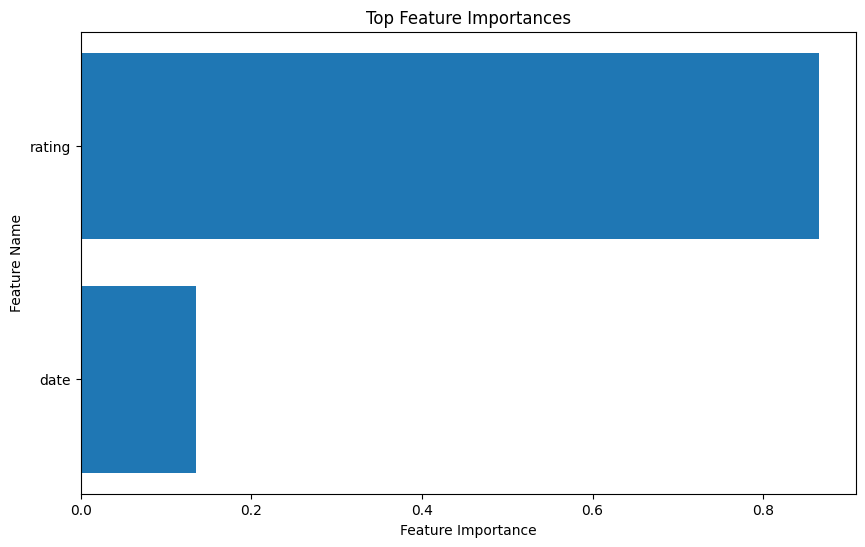

,Feature,Importance
0,rating,0.865117
1,date,0.134883


In [19]:
import matplotlib.pyplot as plt

noFE_train, noFE_test, noFE_ytrain = X_train.copy(), X_test.copy(), y_train.copy()
noFE_train['date'] = pd.to_datetime(noFE_train['date']).astype('int64') // 10**9
noFE_test['date'] = pd.to_datetime(noFE_test['date']).astype('int64') // 10**9

noFE_train = noFE_train.drop(columns=["user_id", "prod_id"])
noFE_test = noFE_test.drop(columns=["user_id", "prod_id"])

temp = noFE_train.copy() # used for feature importance labels
noFE_train = scaler.fit_transform(noFE_train)
noFE_test = scaler.transform(noFE_test)
print(f"Before SMOTE: {noFE_train.shape}")

noFE_train, noFE_ytrain = smote.fit_resample(noFE_train, noFE_ytrain)
print(f"After SMOTE: {noFE_train.shape}")

for name, model in models.items():
    print(f"=== Model: {name} ===")
    model.fit(noFE_train, noFE_ytrain)
    y_pred = model.predict(noFE_test)
    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")

    # Print results
    # print(f"Accuracy: {accuracy:.4f}")
    # print(f"Precision: {precision:.4f}")
    # print(f"Recall: {recall:.4f}")
    # print(f"F1 Score: {f1:.4f}")
    # print("\nConfusion Matrix:")
    # print(conf_matrix)

    # # Detailed classification report
    # print("\nClassification Report:")
    # print(classification_report(y_test, y_pred))

    """
    OTHER METRICS
    """
    # Balanced accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Balanced Accuracy: {balanced_acc:.3f}")

    # MCC
    mcc = matthews_corrcoef(y_test, y_pred)

    # PR-AUC
    y_pred_proba = model.predict_proba(noFE_test)


    # ROC-AUC for both classes (Class 0 and Class 1)
    roc_auc_0 = roc_auc_score(y_test, y_pred_proba[:, 0])  # ROC-AUC for Class 0 (minority class)
    roc_auc_1 = roc_auc_score(y_test, y_pred_proba[:, 1])  # ROC-AUC for Class 1 (majority class)

    # PR-AUC for both classes
    precision_0, recall_0, _ = precision_recall_curve(y_test, y_pred_proba[:, 0])  # For Class 0
    pr_auc_0 = auc(recall_0, precision_0)

    precision_1, recall_1, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])  # For Class 1
    pr_auc_1 = auc(recall_1, precision_1)

    # print(f"Balanced Accuracy: {balanced_acc:.3f}")
    # print(f"Matthews Correlation Coefficient: {mcc:.3f}")
    # print(f"PR-AUC for class 0: {pr_auc_0:.3f}")
    # print(f"PR-AUC for class 1: {pr_auc_1:.3f}")

    results.append({
        "Model": name + "_Sc_Sm",
        "Accuracy": f"{accuracy:.4f}",
        "Precision": f"{precision:.4f}",
        "Recall": f"{recall:.4f}",
        "F1 Score": f"{f1:.4f}",
        "Balanced Accuracy": f"{balanced_acc:.4f}",
        "MCC": f"{mcc:.4f}",
        "PR-AUC_0": f"{pr_auc_0:.4f}",
        "PR-AUC_1": f"{pr_auc_1:.4f}",
        "ROC-AUC_0": f"{roc_auc_0:.4f}",
        "ROC-AUC_1": f"{roc_auc_1:.4f}"
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results table
print("\n=== Model Evaluation Results ===")
print(results_df)

# Train XGBoost model
xgclf = XGBClassifier(scale_pos_weight=len(noFE_ytrain[noFE_ytrain == 0]) / len(noFE_ytrain[noFE_ytrain == 1]))
xgclf.fit(noFE_train, noFE_ytrain)

# Get feature importance
feature_importance = xgclf.feature_importances_
feature_names = temp.columns

# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:20], feat_imp_df['Importance'][:20])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Display the top features
feat_imp_df.head()

In [23]:
noFE_train

array([[ 0.93730709,  0.17822766],
       [ 0.06642163, -1.30375758],
       [ 0.93730709,  1.06234964],
       ...,
       [-0.80446383,  0.80440908],
       [-2.54623476,  0.02807205],
       [ 0.93730709,  1.21889738]])

In [24]:
results_df = results_df.sort_values(by="Model")
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Balanced Accuracy,MCC,PR-AUC_0,PR-AUC_1,ROC-AUC_0,ROC-AUC_1
5,AB,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.9339,0.9339,0.5000,0.5000
13,AB_FT_T,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.9339,0.9339,0.5000,0.5000
29,AB_NoScale,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.8129,0.9086,0.3707,0.6293
21,AB_SAMENAME,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.8129,0.9086,0.3707,0.6293
37,AB_Sc_Sm,0.5717,0.9085,0.5631,0.6953,0.5954,0.1296,0.8131,0.9087,0.3705,0.6295
3,DT,0.8643,0.8704,0.9913,0.9269,0.5111,0.0700,0.9339,0.9339,0.5000,0.5000
11,DT_FT_T,0.8643,0.8704,0.9913,0.9269,0.5111,0.0700,0.9339,0.9339,0.5000,0.5000
27,DT_NoScale,0.8643,0.8704,0.9913,0.9269,0.5111,0.0703,0.8230,0.9018,0.3967,0.6033
19,DT_SAMENAME,0.8643,0.8704,0.9913,0.9269,0.5111,0.0700,0.8230,0.9019,0.3966,0.6034
35,DT_Sc_Sm,0.6272,0.8925,0.6485,0.7512,0.5680,0.0954,0.8275,0.8987,0.4074,0.5926


In [13]:
results_df # scaling using fittrf, trf

,Model,Accuracy,Precision,Recall,F1 Score,Balanced Accuracy,MCC,PR-AUC_0,PR-AUC_1,ROC-AUC_0,ROC-AUC_1
0,LR,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.9339,0.9339,0.5000,0.5000
1,NN,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.9339,0.9339,0.5000,0.5000
2,KNN,0.8534,0.8710,0.9756,0.9203,0.5135,0.0557,0.9339,0.9339,0.5000,0.5000
3,DT,0.8643,0.8704,0.9913,0.9269,0.5111,0.0700,0.9339,0.9339,0.5000,0.5000
4,RF,0.8653,0.8699,0.9933,0.9275,0.5092,0.0655,0.9339,0.9339,0.5000,0.5000
5,AB,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.9339,0.9339,0.5000,0.5000
6,XGB,0.8677,0.8679,0.9997,0.9291,0.5004,0.0132,0.9339,0.9339,0.5000,0.5000
7,NB,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.9339,0.9339,0.5000,0.5000
8,LR_FT_T,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.9339,0.9339,0.5000,0.5000
9,NN_FT_T,0.8678,0.8678,1.0000,0.9292,0.5000,0.0000,0.9339,0.9339,0.5000,0.5000


# Apply feature engineering to train set

In [ ]:
# from UserFeatureEngineering import UserEngineer
# from RestaurantFeatureEngineering import RestaurantEngineer

# userFeatureEngineer = UserEngineer(X_train)
# restaurantFeatureEngineer = RestaurantEngineer(X_train)

# # Create the features and merge them with original dataset
# user_features_train = userFeatureEngineer.aggregateTrainFeatures()
# res_features_train = restaurantFeatureEngineer.aggregateTrainFeatures()

# new_X_train = X_train.merge(res_features_train, on='prod_id', how='left').merge(user_features_train, on='user_id', how='left')

# # Convert date to seconds
# new_X_train['date'] = pd.to_datetime(new_X_train['date']).astype('int64') // 10**9

# new_X_train

,user_id,prod_id,rating,date,total_reviews_for_restaurant,avg_rating_for_restaurant,std_dev_rating_for_restaurant,median_rating_for_restaurant,review_frequency_for_restaurant,extreme_rating_index,...,rating_mean,rating_min,rating_max,rating_std,user_earliest,user_latest,user_days_active,user_review_timespan,users_avg_per_day,user_active_percentage
0,262543,4972,5.0,1356998400,38,3.710526,1.353831,4.0,58.105263,1.394737,...,5.0,5.0,5.0,0.000,1356998400,1356998400,1,1,1.000,1.000
1,37032,348,4.0,1271116800,87,3.103448,1.229809,4.0,34.379310,1.045977,...,4.0,4.0,4.0,0.000,1271116800,1271116800,1,1,1.000,1.000
2,242095,1416,5.0,1408233600,300,3.960000,1.236999,4.0,3.973333,1.393333,...,5.0,5.0,5.0,0.000,1408233600,1408233600,1,1,1.000,1.000
3,89259,1276,4.0,1203292800,434,4.085253,0.956134,4.0,6.336406,1.292627,...,4.5,4.0,5.0,0.548,1203292800,1335398400,5,1529,0.004,0.003
4,157249,1856,2.0,1289001600,569,3.376098,1.231565,4.0,5.790861,1.086116,...,2.0,2.0,2.0,0.000,1289001600,1289001600,1,1,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426013,200930,102,4.0,1323734400,66,2.636364,1.431904,3.0,41.863636,1.242424,...,4.0,4.0,4.0,0.000,1323734400,1323734400,1,1,1.000,1.000
426014,51985,446,1.0,1378080000,20,3.050000,1.431782,3.0,93.100000,1.150000,...,1.0,1.0,1.0,0.000,1378080000,1378080000,1,1,1.000,1.000
426015,51611,4850,5.0,1266969600,270,3.985185,1.041768,4.0,11.200000,1.251852,...,4.0,1.0,5.0,2.000,1247184000,1266969600,3,229,0.017,0.013
426016,137139,3685,4.0,1419638400,334,3.943114,1.051124,4.0,5.224551,1.242515,...,4.0,4.0,4.0,0.000,1419638400,1419638400,1,1,1.000,1.000


# Apply feature engineering to test set
### ...sequentially

In [ ]:
# new_X_test = restaurantFeatureEngineer.updateTestRestaurants(X_test)
# new_X_test = userFeatureEngineer.updateTestUsers(new_X_test)
# new_X_test

,user_id,prod_id,rating,date,total_reviews_for_restaurant,avg_rating_for_restaurant,std_dev_rating_for_restaurant,median_rating_for_restaurant,review_frequency_for_restaurant,extreme_rating_index,...,rating_mean,rating_min,rating_max,rating_std,user_earliest,user_latest,user_days_active,user_review_timespan,users_avg_per_day,user_active_percentage
0,8506,4201,1.0,1379030400,33,4.151515,1.034445,4.0,39.878788,1.393939,...,3.000,3.0,3.0,0.000,1379030400,1379030400,0,1,0.000,0.000
1,96054,1298,4.0,1388620800,1260,4.200000,0.916532,4.0,1.398413,1.349206,...,5.000,5.0,5.0,0.000,1415923200,1415923200,1,1,1.000,1.000
2,8150,4223,4.0,1240790400,1993,3.904165,1.150060,4.0,1.240843,1.287506,...,3.500,2.0,4.0,0.837,1219190400,1371081600,5,1758,0.003,0.003
3,19729,4148,3.0,1393372800,1143,3.988626,0.912480,4.0,2.865267,1.167104,...,4.333,3.0,5.0,0.651,1332374400,1416268800,11,971,0.012,0.011
4,250551,2953,5.0,1371513600,16,3.687500,1.621471,4.5,162.375000,1.562500,...,3.000,3.0,3.0,0.000,1371513600,1371513600,0,1,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182575,169241,1261,2.0,1334620800,27,3.185185,1.039121,3.0,64.148148,0.851852,...,3.500,2.0,5.0,2.121,1336348800,1361145600,2,287,0.007,0.007
182576,90173,4223,2.0,1364947200,1993,3.904165,1.150060,4.0,1.240843,1.287506,...,3.750,2.0,5.0,1.258,1362355200,1401667200,4,455,0.009,0.009
182577,58745,4525,4.0,1303084800,254,3.897638,0.984742,4.0,6.897638,1.141732,...,3.375,2.0,5.0,1.302,1264291200,1412985600,7,1721,0.005,0.004
182578,9496,3909,5.0,1370649600,113,4.309735,1.118670,5.0,25.044248,1.575221,...,3.960,2.0,5.0,0.735,1290124800,1414713600,24,1442,0.017,0.017


# Drop user ID and prod ID after features are done

In [ ]:
# new_X_train = new_X_train.drop(columns=["user_id", "prod_id"], errors="ignore")
# new_X_test = new_X_test.drop(columns=["user_id", "prod_id"], errors="ignore")

# print(new_X_train.shape, new_X_test.shape)

(426018, 19) (182580, 19)


In [8]:
from FeatureEngineer import CombinedEngineer

engineer = CombinedEngineer()
engineer.fit(X_train)
new_X_train = engineer.transform(X_train)
new_X_test = engineer.transform(X_test)

# Standard Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

new_X_train = pd.DataFrame(scaler.fit_transform(new_X_train), columns=new_X_train.columns)
new_X_test = pd.DataFrame(scaler.transform(new_X_test), columns=new_X_test.columns)

# Apply SMOTE to balance dataset

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
new_X_train, y_train = smote.fit_resample(new_X_train, y_train)
new_X_train

,rating,date,total_reviews_for_restaurant,avg_rating_for_restaurant,std_dev_rating_for_restaurant,median_rating_for_restaurant,review_frequency_for_restaurant,extreme_rating_index,user_restaurants_reviewed,rating_mean,rating_min,rating_max,rating_std,user_earliest,user_latest,user_days_active,user_review_timespan,users_avg_per_day,user_active_percentage
0,0.937307,0.178228,-0.642118,-0.558431,1.509170,-0.237770,1.358804,0.546434,-0.531179,1.179467,1.398144,0.521306,-0.987654,0.463971,-0.205262,-0.504192,-0.740346,0.561211,1.154956
1,0.066422,-1.303758,-0.586950,-2.148507,0.840014,-0.237770,0.601558,-1.460737,-0.531179,0.083582,0.662673,-0.520944,-0.987654,-0.886856,-1.831427,-0.504192,-0.740346,0.561211,1.154956
2,0.937307,1.062350,-0.347134,0.094997,0.878810,-0.237770,-0.368891,0.538357,-0.531179,1.179467,1.398144,0.521306,-0.987654,1.269847,0.764875,-0.504192,-0.740346,0.561211,1.154956
3,0.066422,-2.474138,-0.196264,0.423064,-0.636580,-0.237770,-0.293470,-0.041227,-0.152204,0.631525,0.662673,0.521306,-0.030855,-1.953657,-0.614257,-0.150869,1.685853,-0.646189,-0.860887
4,-1.675349,-0.995135,-0.044269,-1.434374,0.849488,-0.237770,-0.310882,-1.229730,-0.531179,-2.108188,-0.808269,-2.605445,-0.987654,-0.605547,-1.492779,-0.504192,-0.740346,0.561211,1.154956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739379,-1.675349,-1.369627,-0.273091,-0.115823,0.413375,-0.237770,-0.279648,-0.214853,-0.531179,-2.108188,-0.808269,-2.605445,-0.987654,-0.946896,-1.903704,-0.504192,-0.740346,0.561211,1.154956
739380,0.066422,-0.373896,-0.488231,-0.119363,-0.246167,-0.237770,0.036459,-0.707218,-0.531179,0.083582,0.662673,-0.520944,-0.987654,-0.039288,-0.811100,-0.504192,-0.740346,0.561211,1.154956
739381,0.060853,0.308141,-0.144473,0.352554,-0.096607,-0.237770,-0.322426,0.217026,-0.303794,0.355802,0.657970,0.521306,-0.111135,0.582387,-0.062710,-0.504192,-0.740346,4.197959,1.154956
739382,-2.546235,0.128746,-0.654710,-3.302959,2.695838,-2.111024,1.446152,0.514732,-0.531179,-3.204073,-1.543740,-3.647696,-0.987654,0.418869,-0.259557,-0.504192,-0.740346,0.561211,1.154956


In [15]:
new_X_train.dtypes

rating                             float64
date                               float64
total_reviews_for_restaurant       float64
avg_rating_for_restaurant          float64
std_dev_rating_for_restaurant      float64
median_rating_for_restaurant       float64
review_frequency_for_restaurant    float64
extreme_rating_index               float64
user_restaurants_reviewed          float64
rating_mean                        float64
rating_min                         float64
rating_max                         float64
rating_std                         float64
user_earliest                      float64
user_latest                        float64
user_days_active                   float64
user_review_timespan               float64
users_avg_per_day                  float64
user_active_percentage             float64
dtype: object

In [16]:
new_X_test.dtypes

rating                             float64
date                               float64
total_reviews_for_restaurant       float64
avg_rating_for_restaurant          float64
std_dev_rating_for_restaurant      float64
median_rating_for_restaurant       float64
review_frequency_for_restaurant    float64
extreme_rating_index               float64
user_restaurants_reviewed          float64
rating_mean                        float64
rating_min                         float64
rating_max                         float64
rating_std                         float64
user_earliest                      float64
user_latest                        float64
user_days_active                   float64
user_review_timespan               float64
users_avg_per_day                  float64
user_active_percentage             float64
dtype: object

In [17]:
new_X_train.isnull().sum()

rating                             0
date                               0
total_reviews_for_restaurant       0
avg_rating_for_restaurant          0
std_dev_rating_for_restaurant      0
median_rating_for_restaurant       0
review_frequency_for_restaurant    0
extreme_rating_index               0
user_restaurants_reviewed          0
rating_mean                        0
rating_min                         0
rating_max                         0
rating_std                         0
user_earliest                      0
user_latest                        0
user_days_active                   0
user_review_timespan               0
users_avg_per_day                  0
user_active_percentage             0
dtype: int64

In [18]:
new_X_test.isnull().sum()

rating                             0
date                               0
total_reviews_for_restaurant       0
avg_rating_for_restaurant          0
std_dev_rating_for_restaurant      0
median_rating_for_restaurant       0
review_frequency_for_restaurant    0
extreme_rating_index               0
user_restaurants_reviewed          0
rating_mean                        0
rating_min                         0
rating_max                         0
rating_std                         0
user_earliest                      0
user_latest                        0
user_days_active                   0
user_review_timespan               0
users_avg_per_day                  0
user_active_percentage             0
dtype: int64

In [19]:
new_X_train

,rating,date,total_reviews_for_restaurant,avg_rating_for_restaurant,std_dev_rating_for_restaurant,median_rating_for_restaurant,review_frequency_for_restaurant,extreme_rating_index,user_restaurants_reviewed,rating_mean,rating_min,rating_max,rating_std,user_earliest,user_latest,user_days_active,user_review_timespan,users_avg_per_day,user_active_percentage
0,0.937307,0.178228,-0.642118,-0.558431,1.509170,-0.237770,1.358804,0.546434,-0.531179,1.179467,1.398144,0.521306,-0.987654,0.463971,-0.205262,-0.504192,-0.740346,0.561211,1.154956
1,0.066422,-1.303758,-0.586950,-2.148507,0.840014,-0.237770,0.601558,-1.460737,-0.531179,0.083582,0.662673,-0.520944,-0.987654,-0.886856,-1.831427,-0.504192,-0.740346,0.561211,1.154956
2,0.937307,1.062350,-0.347134,0.094997,0.878810,-0.237770,-0.368891,0.538357,-0.531179,1.179467,1.398144,0.521306,-0.987654,1.269847,0.764875,-0.504192,-0.740346,0.561211,1.154956
3,0.066422,-2.474138,-0.196264,0.423064,-0.636580,-0.237770,-0.293470,-0.041227,-0.152204,0.631525,0.662673,0.521306,-0.030855,-1.953657,-0.614257,-0.150869,1.685853,-0.646189,-0.860887
4,-1.675349,-0.995135,-0.044269,-1.434374,0.849488,-0.237770,-0.310882,-1.229730,-0.531179,-2.108188,-0.808269,-2.605445,-0.987654,-0.605547,-1.492779,-0.504192,-0.740346,0.561211,1.154956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739379,-1.675349,-1.369627,-0.273091,-0.115823,0.413375,-0.237770,-0.279648,-0.214853,-0.531179,-2.108188,-0.808269,-2.605445,-0.987654,-0.946896,-1.903704,-0.504192,-0.740346,0.561211,1.154956
739380,0.066422,-0.373896,-0.488231,-0.119363,-0.246167,-0.237770,0.036459,-0.707218,-0.531179,0.083582,0.662673,-0.520944,-0.987654,-0.039288,-0.811100,-0.504192,-0.740346,0.561211,1.154956
739381,0.060853,0.308141,-0.144473,0.352554,-0.096607,-0.237770,-0.322426,0.217026,-0.303794,0.355802,0.657970,0.521306,-0.111135,0.582387,-0.062710,-0.504192,-0.740346,4.197959,1.154956
739382,-2.546235,0.128746,-0.654710,-3.302959,2.695838,-2.111024,1.446152,0.514732,-0.531179,-3.204073,-1.543740,-3.647696,-0.987654,0.418869,-0.259557,-0.504192,-0.740346,0.561211,1.154956


In [20]:
new_X_test

,rating,date,total_reviews_for_restaurant,avg_rating_for_restaurant,std_dev_rating_for_restaurant,median_rating_for_restaurant,review_frequency_for_restaurant,extreme_rating_index,user_restaurants_reviewed,rating_mean,rating_min,rating_max,rating_std,user_earliest,user_latest,user_days_active,user_review_timespan,users_avg_per_day,user_active_percentage
0,-2.546235,0.558415,-0.647748,0.596619,-0.214062,-0.237770,0.777081,0.541844,-0.606974,-1.012303,-0.072798,-1.563195,-0.987654,0.810512,0.211913,-0.592523,-0.740346,-0.651038,-0.866953
1,0.066422,0.723908,0.733724,0.723612,-0.850250,-0.237770,-0.451073,0.284398,-0.531179,1.179467,1.398144,0.521306,-0.987654,1.390797,0.910477,-0.504192,-0.740346,0.561211,1.154956
2,0.066422,-1.827074,1.559004,-0.051249,0.409734,-0.237770,-0.456102,-0.070696,-0.152204,-0.464360,-0.808269,-0.520944,0.473734,-1.703604,0.061403,-0.150869,2.049465,-0.647402,-0.860887
3,-0.804464,0.805910,0.601994,0.169976,-0.872114,-0.237770,-0.404257,-0.763630,0.302565,0.448512,-0.072798,0.521306,0.148981,0.076662,0.917021,0.379116,0.799846,-0.636491,-0.844712
4,0.937307,0.428704,-0.666888,-0.618743,2.953201,0.698857,4.686718,1.511939,-0.606974,-1.012303,-0.072798,-1.563195,-0.987654,0.692280,0.069583,-0.592523,-0.740346,-0.651038,-0.866953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182575,-1.675349,-0.207923,-0.654503,-1.934419,-0.188832,-2.111024,1.551672,-2.577959,-0.455384,-0.464360,-0.808269,0.521306,2.715577,0.139175,-0.126735,-0.415861,-0.286228,-0.642553,-0.852800
182576,-1.675349,0.315393,1.559004,-0.051249,0.409734,-0.237770,-0.456102,-0.070696,-0.303794,-0.190389,-0.808269,0.521306,1.208793,0.548228,0.640540,-0.239200,-0.019473,-0.640128,-0.848756
182577,0.066422,-0.752113,-0.398925,-0.068344,-0.482227,-0.237770,-0.275558,-0.909649,-0.000615,-0.601346,-0.808269,0.521306,1.285616,-0.994216,0.854854,0.025793,1.990716,-0.644977,-0.858865
182578,0.937307,0.413795,-0.557676,1.011031,0.240370,1.635484,0.303616,1.585152,1.287899,0.039747,-0.808269,0.521306,0.295644,-0.587880,0.887573,1.527416,1.547712,-0.630430,-0.832581


# Train model
**Balanced Accuracy** is the average of sensitivity (recall) and specificity. It's used to evaluate models when the dataset is imbalanced, as it provides a more balanced measure of the model's performance across both classes.\
\
**Matthews Corelation Coefficient (MCC)**: is a measure of the quality of binary (two-class) classifications. Unlike accuracy, precision, or recall, it considers all four quadrants of the confusion matrix. \
1 indicates perfect prediction.
0 indicates random prediction.
-1 indicates total disagreement between prediction and truth (e.g., if the model predicts everything wrong).\
\
**PR-AUC** is the area under the Precision-Recall curve, which plots Precision (positive predictive value) vs Recall (sensitivity) for different thresholds of classification.\
1 indicates perfect precision and recall.
0 indicates no precision or recall (i.e., the model is performing terribly).

In [11]:
for name, model in models.items():
    print(f"=== Model: {name} ===")
    
    print("Predicting..")
    model.fit(new_X_train, y_train)
    y_pred = model.predict(new_X_test)

    print("Calculating..")
    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    # print("\nConfusion Matrix:")
    # print(conf_matrix)
    # print("\nClassification Report:")
    # print(classification_report(y_test, y_pred))

    """
    OTHER METRICS
    """
    # Balanced accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Balanced Accuracy: {balanced_acc:.3f}")

    # MCC
    mcc = matthews_corrcoef(y_test, y_pred)

    # PR-AUC
    y_pred_proba = model.predict_proba(new_X_test)


    # ROC-AUC for both classes (Class 0 and Class 1)
    roc_auc_0 = roc_auc_score(y_test, y_pred_proba[:, 0])  # ROC-AUC for Class 0 (minority class)
    roc_auc_1 = roc_auc_score(y_test, y_pred_proba[:, 1])  # ROC-AUC for Class 1 (majority class)

    # PR-AUC for both classes
    precision_0, recall_0, _ = precision_recall_curve(y_test, y_pred_proba[:, 0])  # For Class 0
    pr_auc_0 = auc(recall_0, precision_0)

    precision_1, recall_1, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])  # For Class 1
    pr_auc_1 = auc(recall_1, precision_1)

    # print(f"Balanced Accuracy: {balanced_acc:.3f}")
    # print(f"Matthews Correlation Coefficient: {mcc:.3f}")
    # print(f"PR-AUC for class 0: {pr_auc_0:.3f}")
    # print(f"PR-AUC for class 1: {pr_auc_1:.3f}")

    results.append({
        "Model": f"{name}_FE",
        "Accuracy": f"{accuracy:.4f}",
        "Precision": f"{precision:.4f}",
        "Recall": f"{recall:.4f}",
        "F1 Score": f"{f1:.4f}",
        "Balanced Accuracy": f"{balanced_acc:.4f}",
        "MCC": f"{mcc:.4f}",
        "PR-AUC_0": f"{pr_auc_0:.4f}",
        "PR-AUC_1": f"{pr_auc_1:.4f}",
        "ROC-AUC_0": f"{roc_auc_0:.4f}",
        "ROC-AUC_1": f"{roc_auc_1:.4f}"
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort the results by "Model" alphabetically
results_df = results_df.sort_values(by="Model")

# Display the results table
print("\n=== Model Evaluation Results ===")
print(results_df)

=== Model: LR ===
Predicting..
Calculating..
Accuracy: 0.655, Precision: 0.937, Recall: 0.645, F1: 0.764
Balanced Accuracy: 0.681
=== Model: NN ===
Predicting..


c:\Users\cryst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Calculating..
Accuracy: 0.792, Precision: 0.874, Recall: 0.887, F1: 0.881
Balanced Accuracy: 0.525
=== Model: KNN ===
Predicting..
Calculating..
Accuracy: 0.749, Precision: 0.891, Recall: 0.810, F1: 0.848
Balanced Accuracy: 0.579
=== Model: DT ===
Predicting..
Calculating..
Accuracy: 0.766, Precision: 0.899, Recall: 0.824, F1: 0.859
Balanced Accuracy: 0.607
=== Model: RF ===
Predicting..
Calculating..
Accuracy: 0.841, Precision: 0.886, Recall: 0.936, F1: 0.911
Balanced Accuracy: 0.574
=== Model: AB ===
Predicting..


c:\Users\cryst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Calculating..
Accuracy: 0.734, Precision: 0.873, Recall: 0.811, F1: 0.841
Balanced Accuracy: 0.517
=== Model: XGB ===
Predicting..
Calculating..
Accuracy: 0.667, Precision: 0.960, Recall: 0.643, F1: 0.770
Balanced Accuracy: 0.734
=== Model: NB ===
Predicting..
Calculating..
Accuracy: 0.549, Precision: 0.977, Recall: 0.491, F1: 0.654
Balanced Accuracy: 0.708

=== Model Evaluation Results ===
    Model Accuracy Precision  Recall  ... PR-AUC_0 PR-AUC_1 ROC-AUC_0 ROC-AUC_1
5   AB_FE   0.7335    0.8726  0.8114  ...   0.8266   0.9354    0.3457    0.6543
3   DT_FE   0.7663    0.8986  0.8237  ...   0.8195   0.9376    0.3932    0.6068
2  KNN_FE   0.7487    0.8908  0.8096  ...   0.8190   0.9320    0.3762    0.6238
0   LR_FE   0.6546    0.9375  0.6450  ...   0.7968   0.9531    0.2626    0.7374
7   NB_FE   0.5486    0.9774  0.4912  ...   0.7943   0.9527    0.2609    0.7388
1   NN_FE   0.7915    0.8744  0.8872  ...   0.8787   0.8255    0.6110    0.3890
4   RF_FE   0.8406    0.8864  0.9363  ...   0.

In [12]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Balanced Accuracy,MCC,PR-AUC_0,PR-AUC_1,ROC-AUC_0,ROC-AUC_1
5,AB_FE,0.7335,0.8726,0.8114,0.8409,0.5169,0.0289,0.8266,0.9354,0.3457,0.6543
3,DT_FE,0.7663,0.8986,0.8237,0.8595,0.6067,0.1792,0.8195,0.9376,0.3932,0.6068
2,KNN_FE,0.7487,0.8908,0.8096,0.8483,0.5791,0.1313,0.8190,0.9320,0.3762,0.6238
0,LR_FE,0.6546,0.9375,0.6450,0.7642,0.6813,0.2505,0.7968,0.9531,0.2626,0.7374
7,NB_FE,0.5486,0.9774,0.4912,0.6538,0.7083,0.2846,0.7943,0.9527,0.2609,0.7388
1,NN_FE,0.7915,0.8744,0.8872,0.8808,0.5254,0.0530,0.8787,0.8255,0.6110,0.3890
4,RF_FE,0.8406,0.8864,0.9363,0.9107,0.5743,0.1821,0.7624,0.9682,0.1898,0.8102
6,XGB_FE,0.6673,0.9603,0.6432,0.7704,0.7343,0.3217,0.7558,0.9675,0.1875,0.8125


In [32]:
results_df.to_csv("b1_results.csv")

# Check Feature Importance using xgb

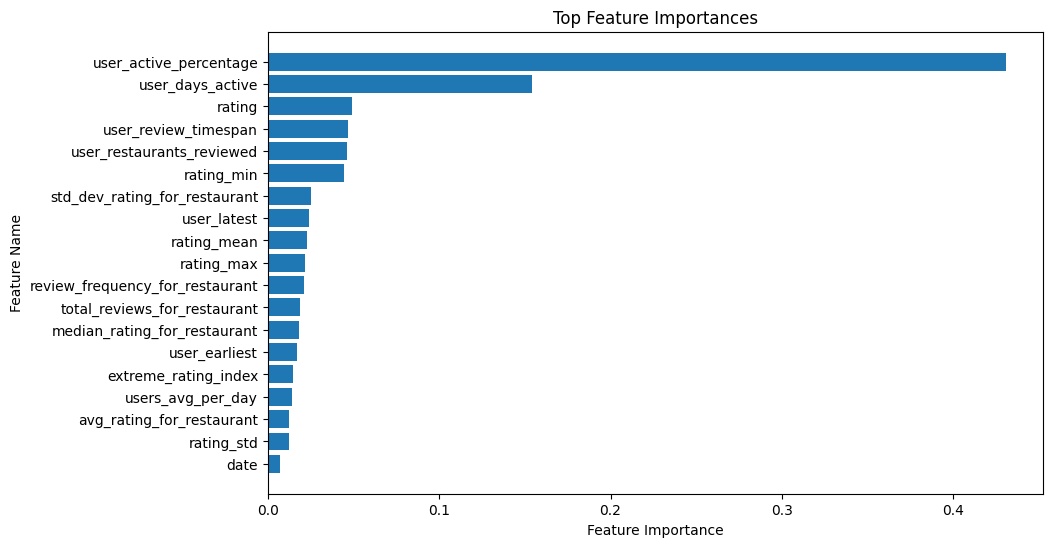

,Feature,Importance
18,user_active_percentage,0.430840
15,user_days_active,0.154101
0,rating,0.049262
16,user_review_timespan,0.046630
8,user_restaurants_reviewed,0.046117
10,rating_min,0.044611
4,std_dev_rating_for_restaurant,0.025094
14,user_latest,0.024005
9,rating_mean,0.023032
11,rating_max,0.021486


In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Train XGBoost model
xgclf = xgb.XGBClassifier()
xgclf.fit(new_X_train, y_train)

# Get feature importance
feature_importance = xgclf.feature_importances_
feature_names = new_X_train.columns

# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:20], feat_imp_df['Importance'][:20])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Display the top features
feat_imp_df.head(20)

In [ ]:
# checking versions (sync with kaggle if using)
import sys
import numpy as np
import pandas as pd
import sklearn

print("Python Version:", sys.version)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Scikit-Learn Version:", sklearn.__version__)

Python Version: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
NumPy Version: 1.26.3
Pandas Version: 2.2.1
Scikit-Learn Version: 1.5.0
